In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
raw_data_path = os.path.join(os.path.pardir,'data','raw')
train_file_path = os.path.join(os.path.join(raw_data_path,'train.csv'))
test_file_path = os.path.join(os.path.join(raw_data_path,'test.csv'))
train_df = pd.read_csv(train_file_path,index_col='PassengerId')
test_df = pd.read_csv(test_file_path,index_col='PassengerId')

In [3]:
df= pd.concat((train_df,test_df),axis=0)

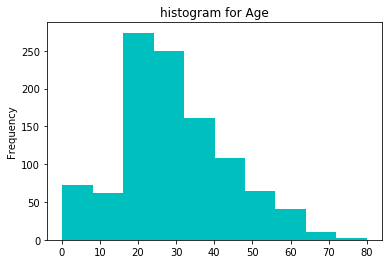

In [4]:
df.Age.plot(kind='hist',title='histogram for Age',color='c')

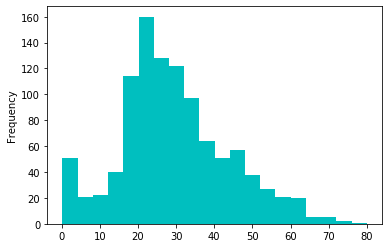

In [5]:
#設置更多bucket
df.Age.plot(kind='hist',color='c',bins=20);

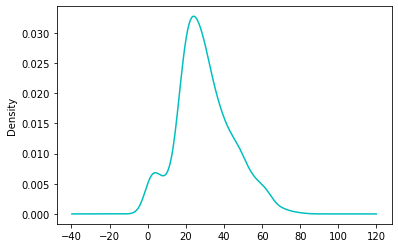

In [6]:
#kde
df.Age.plot(kind='kde',color='c');

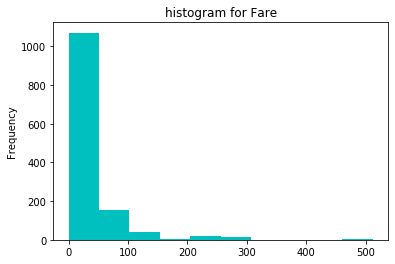

In [7]:
df.Fare.plot(kind='hist',title='histogram for Fare',color='c')

In [8]:
#比較年齡和票價的偏斜函數
print('skewness for age: {0:.02f}'.format(df.Age.skew()))
print('skewness for fare: {0:.02f}'.format(df.Fare.skew()))

skewness for age: 0.41
skewness for fare: 4.37


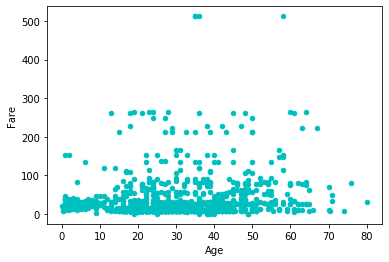

In [9]:
df.plot.scatter(x='Age',y='Fare',color='c')

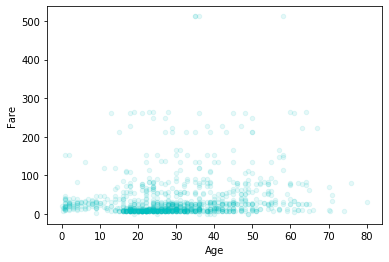

In [12]:
#年齡和票價沒有明顯的相關性
df.plot.scatter(x='Age',y='Fare',color='c',alpha=0.1)

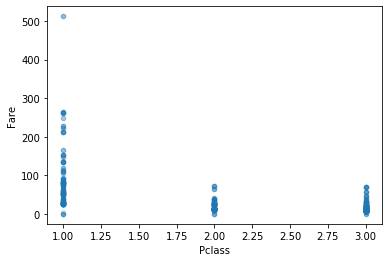

In [13]:
#客艙和票價的關係
df.plot.scatter(x='Pclass',y='Fare',alpha=0.15)

In [14]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [15]:
df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [18]:
df.groupby(['Pclass'])['Fare','Age'].median()

D:\ANACONDA\envs\ML\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [19]:
#聚合，獲得票價的的平均值年齡的中位數，使用agg傳入字典
df.groupby('Pclass').agg({'Fare':'mean','Age':'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [48]:
aggre={
    'Fare':{
        'mean',
        'median',
        max,
        np.max
    },
    'Age': {
        'median',
        min,
        max,
        lambda x:max(x)-min(x)
    }
}

In [49]:
df.groupby('Pclass').agg(aggre)

Fare                                 Age                        
             max       mean      amax   median   max <lambda_0> median   min
Pclass                                                                      
1       512.3292  87.508992  512.3292  60.0000  80.0      79.08   39.0  0.92
2        73.5000  21.179196   73.5000  15.0458  70.0      69.33   29.0  0.67
3        69.5500  13.302889   69.5500   8.0500  74.0      73.83   24.0  0.17

In [50]:
#雙重分祖
df.groupby(['Pclass','Embarked']).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64